**<h1><center>CS 464</center></h1>**
**<h1><center>Introduction to Machine Learning</center></h1>**
**<h1><center>Fall 2021</center></h1>**
**<h1><center>Homework 3</center></h1>**
<h4><center>Due: Jan 02, 2022 17:00 (GMT+3)</center></h4>

### Instructions

<ul>
    <li>
    This homework contains both written and programming questions about neural networks. You should implement programming questions on this notebook. Your plots should also be produced in this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question.
    </li>
    <li>
    For questions that you need to plot, your plot results have to be included in the cell output. For written questions, you may provide them either as comments in code cells or as seperate text cells. 
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use different libraries than given libraries in the code segments of this homework except for libraries inclueded in Python Standard Library (https://docs.python.org/3/library/).
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
    While submitting the homework file, please package notebook(".ipynb") and model (".pth") files as a gzipped TAR file or a ZIP file with the name cs464_hw3_section#_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and model files. Upload your homework to Moodle.
    </li>
    <li>
    This is an individual assignment for each student. That is, you are NOT allowed to share your work with your classmates.</li>
    <li> 
    If you do not follow the submission routes, deadlines and specifications, it will lead to a significant grade deduction.
    </li>
    <li> 
    If you have any questions, please contact "hakansivuk@gmail.com".
    </li>

</ul>

## Environment Setup

This homewrok is prepeared by using Google CoLab which already has required libraries. However, if you are using your own local Jupyter or any other Python notebook editor, you may use both anaconda or pip to install PyTorch to your own computer.

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

#### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries, replace the "package_name" in the following command and run it in activated "hw3" environment <br>
        <i>> pip install "package_name"<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>


#### Pytorch Installation with Anaconda

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

###Pip3 Installation
<ul>
    <li>Download pip3 from https://pip.pypa.io/en/stable/installing/</li>
    <li>If you are using Windows, you may need to add Python to your enviroment variables. You may use the following tutorial to install Python and pip.
    https://phoenixnap.com/kb/how-to-install-python-3-windows</li>
</ul>

#### PyTorch Installation with Pip
<ul>
<li>For MacOS:<br>
    <i>> pip3 install torch torchvision</i>
</li>
<li>For Linux:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i>
</li>
<li>For Windows:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i><br>
</li>


##Question 1 [12 pts.]

Answer the given questions with **at most a sentence**.

  >a) Why do people use validation data?<br>

  >b) What is the difference between mean squared error and mean absolute error?  <br>

  >c) What is the main problem of using sigmoid as activation function in an artificial neural network (ANN)?<br>

>d) What does it mean to overfit your data model?<br>

  >e) Your input image size is 3x64x64. If you apply 3x3 convolution with input_channel=3, output_channel=6, padding=0, stride=2, what would be the size of the output?<br>

  >f) In the previous question, how many trainable parameters are there? (you should also consider bias terms in addition to weights)<br>




a) To check measurements during training and select the best model

b) mse computes the summation of the error squared while mae computes the summation of the absolute value of error 

c) Sigmoid function does not allow multiclass labels (non-binary).

d) When the model is too complex for the problem and contains noise features/data.

e) 6\*31\*31= 5766

f) 6\*(3\*3\*3+1) = 168



##Question 2 [88 pts.]

Computer vision (CV) is the field of study that deals with how computers can gain high-level understanding from digital images or videos. Your task for this question is to classify scenes according to their contexts by using simple machine learning algorithms developed for CV problems on scene images.

Your dataset consist of scene images from 4 contexts. Images of each context is stored under separate folders in the compressed file given to you.  The dataset has been processed in such a way that each class has approximately 2500 samples.

Download the dataset from the following link:
<br>
https://drive.google.com/file/d/1l51t3aTY7B131fwq92ACI_b_D5Idq5In/view?usp=sharing
<br>

Libraries that are required in this question is given in the following code cell.

### Data Loader [6 pts.]

An important part of such a task is to implement your own data loader. In this homework, a partial loader is provided to you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below to create your custom "SceneDataset" class which will be able to load your dataset. Implement the functions whose proptotypes are given. Follow the TODO notes below. You have to divide the files into three sets as <b>train (70%)</b>, 
<b>validation (10%)</b> and **test (20%)** sets.  These non-overlapping splits, which are subsets of SceneDataset, should be retrieved using the "get_dataset" function.

Hint: The dataset is not normalized and your results will heavily depend on your input.

In [18]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

# To Read Data
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image
# To Interpret results & obtain plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

# You could add your own libraries form Python Standard Library in this cell. Any other external libraries are not allowed.
import os
import math

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
class SceneDataset(Dataset):

    def __init__(self, x, y): 
        self.x = x
        self.y = y
  
    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, index):
        return torch.tensor(self.x[index]).permute(2, 0, 1).float(), torch.tensor(self.y[index]).long()

label sea loaded
label glacier loaded
label mountain loaded
label forest loaded


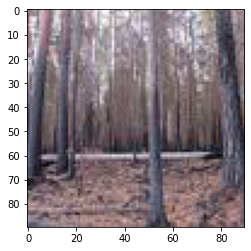

In [6]:
path = '/content/drive/MyDrive/data'

map = {
            'sea': 0,
            'forest': 1,
            'mountain': 2,
            'glacier': 3,
}

def get_dataset(root):

  dataset = []
  labels = []

  for i, filename in enumerate(os.listdir(root)):
    
    label = map.get(filename)

    for j, image_name in enumerate(os.listdir(root + '/' + filename)):
      image = Image.open(root + '/' + filename + '/' + image_name)
      image = np.asarray(image)
      image = np.reshape(image, (90, 90, 3))

      dataset.append(image)
      labels.append(label)
    print('label ' + filename + ' loaded')

  # normalize
  dataset = np.asarray(dataset)
  dataset = (dataset -  dataset.min(axis=0)) / (dataset.max(axis=0) - dataset.min(axis=0))

  # split

  #  train 70
  training_dataset , temp_dataset, training_labels, temp_labels = train_test_split(dataset, labels, train_size = 0.7)
  #  test 20, validation 10
  validation_dataset ,test_dataset, validation_labels, test_labels = train_test_split(temp_dataset, temp_labels, test_size = 2/3)

  training_set = SceneDataset(training_dataset, training_labels)
  test_set = SceneDataset(test_dataset, test_labels)
  validation_set = SceneDataset(validation_dataset, validation_labels)

  return training_set, test_set, validation_set
 
  

training_set, test_set, validation_set = get_dataset(path)
plt.imshow(np.reshape(training_set.x[7], (90, 90, 3)))
plt.show()

###Model Implementation [7 pts]

Now implement your CNN. ConvNet class will represent your convolutional neural network. Implement 3 layers of convolution: 
<ul>
    <li>(1) 4 filters with size of 3 x 3 with stride 1 and padding 1, (2) ReLU </li>
    <li>(3) 8 filters with size of 3 x 3 with stride 1 and padding 1, (4) ReLU and (5) MaxPool 2 x 2 </li>
    <li>(6) 16 filters with size of 3 x 3 with stride 1 and padding 1, (7) ReLU and (8) MaxPool 2 x 2 </li> 
</ul>

As the classifier layer, you need to add only one linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes and the activation function for the dense layer.

In [10]:
class ConvNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): 
      super(ConvNet, self).__init__()

      # Convolution layer
      self.conv = nn.Sequential(
          # 1st layer
          nn.Conv2d(3, 4, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),

          # 2nd layer
          nn.Conv2d(4, 8, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(2, 2),

          # 3rd layer
          nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(2, 2),
      )

      # Classifier
      self.fc = nn.Linear(7744, 4)

    def forward(self, X): 
      X = self.conv(X)
      X = X.view(X.size(0), -1)
      X = self.fc(X)

      return X

###Stochastic Gradient Descent [25 pts.]

####Training with SGD [15 pts.]

Train your model up to 300 epochs with properly processed inputs, i.e. call your "get_dataset" function. Use SGD as your optimizer. Tune your learning rate, weight decay. Do not add additional parameters to SGD. Save your best model as "best_cnn_sgd.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model. However, you must explain your reasoning in your choice.

During training, you need to plot two figures:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

epoch= 0 . new best model. loss =  21.595380544662476
epoch= 1 . new best model. loss =  16.541127383708954
epoch= 2 . new best model. loss =  14.856501460075378
epoch= 3 . new best model. loss =  14.602790653705597
epoch= 4 . new best model. loss =  14.51367300748825
epoch= 5 . new best model. loss =  14.256371200084686
epoch= 8 . new best model. loss =  13.749951362609863
epoch= 9 . new best model. loss =  13.39197701215744
epoch= 11 . new best model. loss =  13.043362975120544
epoch= 12 . new best model. loss =  12.730658054351807
epoch= 14 . new best model. loss =  12.243669211864471
epoch= 15 . new best model. loss =  12.199491620063782
epoch= 16 . new best model. loss =  12.13514930009842
epoch= 17 . new best model. loss =  12.01196300983429
epoch= 21 . new best model. loss =  11.606579303741455
epoch= 24 . new best model. loss =  11.56876939535141
epoch= 26 . new best model. loss =  11.344939351081848
epoch= 27 . new best model. loss =  11.094726026058197
epoch= 29 . new best mo

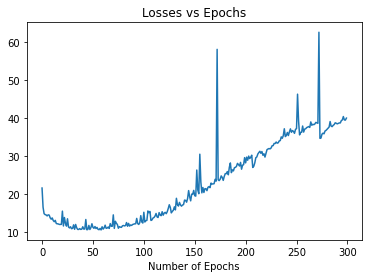

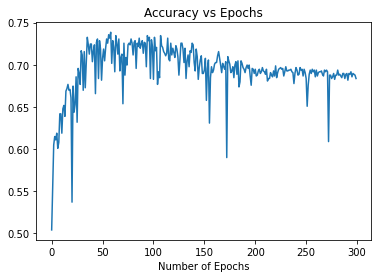

In [28]:
# HINT: note that your training time should not take more than 2 hours.

# TODO:
# Pick your hyper parameters
max_epoch = 300
train_batch = 64
test_batch = 64
learning_rate = 0.005 # try learning rate from the interval [1e-1, 1e-4]

use_gpu = torch.cuda.is_available()

best_path = '/content/drive/MyDrive/best_cnn_sgd.pth'

# Create train dataset loader
training_set_loader = DataLoader(training_set, batch_size=train_batch, shuffle=True)

# Create validation dataset loader
validation_set_loader = DataLoader(validation_set, batch_size=test_batch, shuffle=True)

# Create test dataset loader
test_set_loader = DataLoader(test_set, batch_size=test_batch, shuffle=True)

# initialize your network
model = ConvNet()

# define your loss function
criterion = nn.CrossEntropyLoss()

# define optimizer    
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with weight_decay as well but do not add additional parameters
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
    
loss_arr = []
accuracy_arr = []

best_loss = math.inf

for epoch in range(max_epoch):
  model=model.train().cuda()

    
  #    iterate over training batches
  #    ...
    
  for sample, label in training_set_loader:
    sample = sample.cuda()
    label = label.cuda()
    
    optimizer.zero_grad()

    pred = model(sample)
    loss = criterion(pred, label)

    loss.backward()

    optimizer.step()

  #    Validation
  loss_val = 0
  true_predictions = 0
  num_predictions = 0

  model = model.eval()
  with torch.no_grad():
    # iterate over validation batches
    for sample, label in validation_set_loader:
      sample = sample.cuda()
      label = label.cuda()

      pred = model(sample)
      loss = criterion(pred, label)

      loss_val += loss.item()

      _, pred = torch.max(pred, -1)

      num_predictions += len(sample)
      true_predictions += (pred == label).sum().item()

  accuracy = true_predictions / num_predictions

  loss_arr.append(loss_val)
  accuracy_arr.append(accuracy)

  if loss_val < best_loss:
    torch.save(model, best_path)
    best_loss = loss_val
    print('epoch=', epoch, '. new best model. loss = ', best_loss)


# plot losses vs epoch 
plt.plot(list(range(max_epoch)), loss_arr)
plt.title('Losses vs Epochs')
plt.xlabel('Number of Epochs')
plt.show()


# plot accuracies vs epoch
plt.plot(list(range(max_epoch)), accuracy_arr)
plt.title('Accuracy vs Epochs')
plt.xlabel('Number of Epochs')
plt.show()

####Test with SGD [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Mean Loss: 0.5787675250321627 
Mean Acc: 0.7929141716566867 
Mean Macro Precision: 0.7908498292767988 
Mean Macro Recall: 0.7928698225864559 
Mean Macro F1 Score: 0.7915135325680314


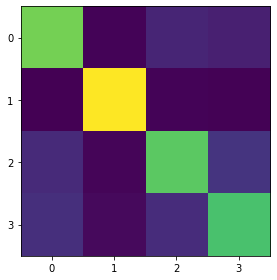

In [27]:
# Test CNN
# load best model
best_path = '/content/drive/MyDrive/best_cnn_sgd.pth'
model = torch.load(best_path)

# evaluate on test set
model = model.eval()

predictions_list = []
labels_list = []

loss_val = 0

with torch.no_grad():
  # iterate over test batches
  for sample, label in test_set_loader:
    sample = sample.cuda()
    label = label.cuda()

    pred = model(sample)
    loss = criterion(pred, label)

    loss_val += loss.item()

    _, pred = torch.max(pred, -1)

    labels_list += label.tolist()
    predictions_list += pred.tolist()

losses = loss_val / len(test_set_loader) # total loss / number of batches

#   get confusion matrix
conf_matrix = confusion_matrix(labels_list, predictions_list)

#   calculate accuracy
acc = accuracy_score(labels_list, predictions_list)

#   calculate precision
pre = precision_score(labels_list, predictions_list, average='macro')

#   calculate recall
recall = recall_score(labels_list, predictions_list, average='macro')

#   calculate F1 score
f1 = f1_score(labels_list, predictions_list, average='macro')

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))

fig.tight_layout()
plt.show()

###Adam Optimizer [25 pts.]

Adam is an adaptive learning rate optimization algorithm that has been designed specifically for training deep neural networks. It was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“.

Nowadays, most of machine learning frameworks, including tensorflow, Pytorch, and Keras, choose Adam as the default optimizer. In this question, you will experiment with it and try to understand why it replaced SGD as the default optimizer.

####Training with ADAM [15 pts.]

Train your model up to 300 epochs with properly processed inputs, i.e. call your "get_dataset". This time use Adam Optimizer as your optimizer. Tune your learning rate, weight decay. Save your best model as "best_cnn_adam.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

epoch= 0 . new best model. loss =  22.18960165977478
epoch= 1 . new best model. loss =  22.186357021331787
epoch= 2 . new best model. loss =  22.185022592544556
epoch= 5 . new best model. loss =  22.1824289560318
epoch= 11 . new best model. loss =  22.180649161338806
epoch= 12 . new best model. loss =  22.178151726722717
epoch= 18 . new best model. loss =  22.177016258239746
epoch= 28 . new best model. loss =  22.175358176231384
epoch= 38 . new best model. loss =  22.17258059978485
epoch= 42 . new best model. loss =  22.170732259750366


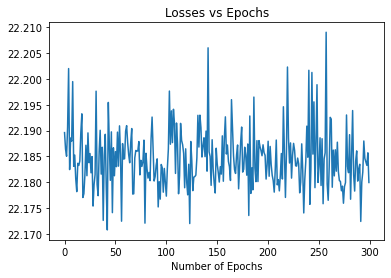

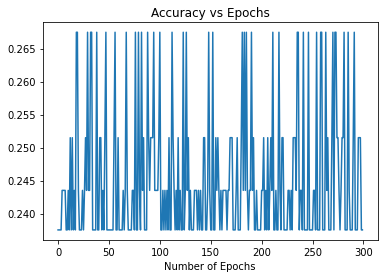

In [23]:
# HINT: note that your training time should not take more than 2 hours.

# TODO:
# Pick your hyper parameters
max_epoch = 300
train_batch = 64
test_batch = 64
learning_rate = 0.005 # try learning rate from the interval [1e-1, 1e-4]

use_gpu = torch.cuda.is_available()

best_path = '/content/drive/MyDrive/best_cnn_adam.pth'

# Create train dataset loader
training_set_loader = DataLoader(training_set, batch_size=train_batch, shuffle=True)

# Create validation dataset loader
validation_set_loader = DataLoader(validation_set, batch_size=test_batch, shuffle=True)

# Create test dataset loader
test_set_loader = DataLoader(test_set, batch_size=test_batch, shuffle=True)

# initialize your network
model = ConvNet()

# define your loss function
criterion = nn.CrossEntropyLoss()

# define optimizer    
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with weight_decay as well but do not add additional parameters
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
    
loss_arr = []
accuracy_arr = []

best_loss = math.inf

for epoch in range(max_epoch):
  model=model.train().cuda()

    
  #    iterate over training batches
  #    ...
    
  for sample, label in training_set_loader:
    sample = sample.cuda()
    label = label.cuda()
    
    optimizer.zero_grad()

    pred = model(sample)
    loss = criterion(pred, label)

    loss.backward()

    optimizer.step()

  #    Validation
  loss_val = 0
  true_predictions = 0
  num_predictions = 0

  model = model.eval()
  with torch.no_grad():
    # iterate over validation batches
    for sample, label in validation_set_loader:
      sample = sample.cuda()
      label = label.cuda()

      pred = model(sample)
      loss = criterion(pred, label)

      loss_val += loss.item()

      _, pred = torch.max(pred, -1)

      num_predictions += len(sample)
      true_predictions += (pred == label).sum().item()

  accuracy = true_predictions / num_predictions

  loss_arr.append(loss_val)
  accuracy_arr.append(accuracy)

  if loss_val < best_loss:
    torch.save(model, best_path)
    best_loss = loss_val
    print('epoch=', epoch, '. new best model. loss = ', best_loss)


# plot losses vs epoch 
plt.plot(list(range(max_epoch)), loss_arr)
plt.title('Losses vs Epochs')
plt.xlabel('Number of Epochs')
plt.show()


# plot accuracies vs epoch
plt.plot(list(range(max_epoch)), accuracy_arr)
plt.title('Accuracy vs Epochs')
plt.xlabel('Number of Epochs')
plt.show()

####Test with ADAM [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **optimizers**. Which one is more preferable? Why?

Mean Loss: 1.3865410052239895 
Mean Acc: 0.25449101796407186 
Mean Macro Precision: 0.06362275449101797 
Mean Macro Recall: 0.25 
Mean Macro F1 Score: 0.10143198090692125


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


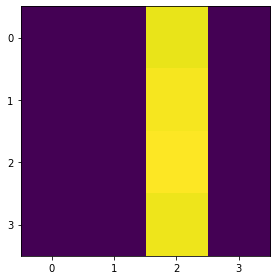

In [25]:
# Test CNN
# load best model
best_path = '/content/drive/MyDrive/best_cnn_adam.pth'
model = torch.load(best_path)

# evaluate on test set
model = model.eval()

predictions_list = []
labels_list = []

loss_val = 0

with torch.no_grad():
  # iterate over test batches
  for sample, label in test_set_loader:
    sample = sample.cuda()
    label = label.cuda()

    pred = model(sample)
    loss = criterion(pred, label)

    loss_val += loss.item()

    _, pred = torch.max(pred, -1)

    labels_list += label.tolist()
    predictions_list += pred.tolist()

losses = loss_val / len(test_set_loader) # total loss / number of batches

#   get confusion matrix
conf_matrix = confusion_matrix(labels_list, predictions_list)

#   calculate accuracy
acc = accuracy_score(labels_list, predictions_list)

#   calculate precision
pre = precision_score(labels_list, predictions_list, average='macro')

#   calculate recall
recall = recall_score(labels_list, predictions_list, average='macro')

#   calculate F1 score
f1 = f1_score(labels_list, predictions_list, average='macro')

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))

fig.tight_layout()
plt.show()


Adam optimizer did not work as intended in this question. It always predicts label: 2 (mountain). A possible reason for this could be that the assigned hyperparameters were not assigned properly (learning_rate, batch_sizes). But most probably, there is a bug in the code. Naturally, the results of SGD is much better than Adam in terms of loss, accuracy, precision, recall and f1 value.



###Transfer Learning [25 pts.]

Instead of training CNNs from scratch, you can use pretrained models and apply them to your task. Transfer learning is a machine learning technique where you can reuse a pretrained machine learning model as a starting point for your own task. In this question, you will experiment with it and try to understand why it is used.

####Training with Transfer Learning [15 pts.]

Get pretrained ResNet18 model from torchvision.models and finetune your model up to 20 epochs with properly processed inputs, i.e. call your "get_dataset". This time use transfer learning. Tune your learning rate, weight decay. Save your best model as "best_cnn_transfer.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch= 0 . new best model. loss =  6.400851249694824
epoch= 1 . new best model. loss =  5.255412817001343
epoch= 2 . new best model. loss =  4.722171291708946
epoch= 3 . new best model. loss =  4.591443717479706
epoch= 5 . new best model. loss =  4.582652166485786


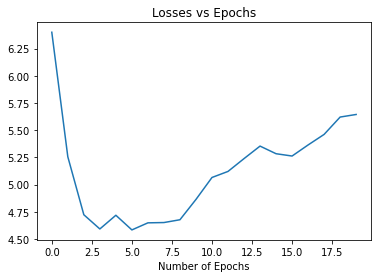

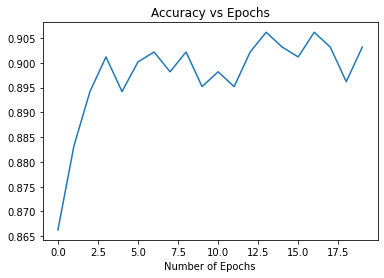

In [24]:
# HINT: note that your training time should not take more than 2 hours.

# TODO:
# Pick your hyper parameters
max_epoch = 20
train_batch = 64
test_batch = 64
learning_rate = 0.005 # try learning rate from the interval [1e-1, 1e-4]

use_gpu = torch.cuda.is_available()

best_path = '/content/drive/MyDrive/best_cnn_transfer.pth'

# Create train dataset loader
training_set_loader = DataLoader(training_set, batch_size=train_batch, shuffle=True)

# Create validation dataset loader
validation_set_loader = DataLoader(validation_set, batch_size=test_batch, shuffle=True)

# Create test dataset loader
test_set_loader = DataLoader(test_set, batch_size=test_batch, shuffle=True)

# initialize your network
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(512, 4)

# define your loss function
criterion = nn.CrossEntropyLoss()

# define optimizer    
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with weight_decay as well but do not add additional parameters
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
    
loss_arr = []
accuracy_arr = []

best_loss = math.inf

for epoch in range(max_epoch):
  model=model.train().cuda()

    
  #    iterate over training batches
  #    ...
    
  for sample, label in training_set_loader:
    sample = sample.cuda()
    label = label.cuda()
    
    optimizer.zero_grad()

    pred = model(sample)
    loss = criterion(pred, label)

    loss.backward()

    optimizer.step()

  #    Validation
  loss_val = 0
  true_predictions = 0
  num_predictions = 0

  model = model.eval()
  with torch.no_grad():
    # iterate over validation batches
    for sample, label in validation_set_loader:
      sample = sample.cuda()
      label = label.cuda()

      pred = model(sample)
      loss = criterion(pred, label)

      loss_val += loss.item()

      _, pred = torch.max(pred, -1)

      num_predictions += len(sample)
      true_predictions += (pred == label).sum().item()

  accuracy = true_predictions / num_predictions

  loss_arr.append(loss_val)
  accuracy_arr.append(accuracy)

  if loss_val < best_loss:
    torch.save(model, best_path)
    best_loss = loss_val
    print('epoch=', epoch, '. new best model. loss = ', best_loss)


# plot losses vs epoch 
plt.plot(list(range(max_epoch)), loss_arr)
plt.title('Losses vs Epochs')
plt.xlabel('Number of Epochs')
plt.show()


# plot accuracies vs epoch
plt.plot(list(range(max_epoch)), accuracy_arr)
plt.title('Accuracy vs Epochs')
plt.xlabel('Number of Epochs')
plt.show()

####Test for Transfer Learning [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Explain the advantages of using transfer learning. Is it better to reuse a pretrained model instead of training a model from scratch? Why?

Mean Loss: 0.2783599873073399 
Mean Acc: 0.9006986027944112 
Mean Macro Precision: 0.9001322062578233 
Mean Macro Recall: 0.9008711473174835 
Mean Macro F1 Score: 0.9003217361300851


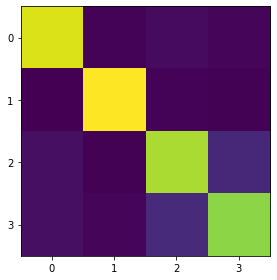

In [26]:
# Test CNN
# load best model
best_path = '/content/drive/MyDrive/best_cnn_transfer.pth'
model = torch.load(best_path)

# evaluate on test set
model = model.eval()

predictions_list = []
labels_list = []

loss_val = 0

with torch.no_grad():
  # iterate over test batches
  for sample, label in test_set_loader:
    sample = sample.cuda()
    label = label.cuda()

    pred = model(sample)
    loss = criterion(pred, label)

    loss_val += loss.item()

    _, pred = torch.max(pred, -1)

    labels_list += label.tolist()
    predictions_list += pred.tolist()

losses = loss_val / len(test_set_loader) # total loss / number of batches

#   get confusion matrix
conf_matrix = confusion_matrix(labels_list, predictions_list)

#   calculate accuracy
acc = accuracy_score(labels_list, predictions_list)

#   calculate precision
pre = precision_score(labels_list, predictions_list, average='macro')

#   calculate recall
recall = recall_score(labels_list, predictions_list, average='macro')

#   calculate F1 score
f1 = f1_score(labels_list, predictions_list, average='macro')

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))

fig.tight_layout()
plt.show()

It is better to reuse a pre-trained model rather than train from scratch because the results obtained from transfer learning is better than both of the models in previous examples in terms of accuracy, precision, loss, recall and f1 score. The algorithm is less complex and the model fits the problem better. It is also faster.